In [77]:
!pip install -U textblob

!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [1]:
import pandas as pd
import numpy as np
import bs4 as bs
import urllib
import urllib.request
from bs4 import BeautifulSoup
import urllib.request
import requests
from urllib.request import urlopen
import re

In [10]:
import requests
amazonurl=requests.get("https://www.amazon.in/Samsung-Galaxy-M12-Storage-Processor/product-reviews/B08XJCMGL7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
html_contents=amazonurl.text
html_contents

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->\n<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->\n<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="a-no-js" lang="en-us"><!--<![endif]--><head>\n<meta http-equiv="content-type" content="text/html; charset=UTF-8">\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<title dir="ltr">Amazon.in</title>\n<meta name="viewport" content="width=device-width">\n<link rel="stylesheet" href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css">\n<script>\n\nif (true === true) {\n    var ue_t0 = (+ new Date()),\n        ue_csm = window,\n        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },\n        ue_furl = "fls-eu.amazon.in",\n        ue_mid = "A2

In [11]:
soup=bs.BeautifulSoup(html_contents,'html.parser')

In [12]:
soup

<!DOCTYPE html>

<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us"><!--<![endif]--><head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title dir="ltr">Amazon.in</title>
<meta content="width=device-width" name="viewport"/>
<link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
<script>

if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        ue_mid = "A21TJRUUN4KGV",


In [13]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="a-no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title dir="ltr">
   Amazon.in
  </title>
  <meta content="width=device-width" name="viewport"/>
  <link href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css" rel="stylesheet"/>
  <script>
   if (true === true) {
    var ue_t0 = (+ new Date()),
        ue_csm = window,
        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },
        ue_furl = "fls-eu.amazon.in",
        

In [14]:
import datetime
now=datetime.datetime.now()
print(soup.title.text,now)

Amazon.in 2022-01-02 16:40:15.289456


In [16]:
a=soup.findall('span',{'class':"a-size-base review-text review-text-content"})
a

TypeError: 'NoneType' object is not callable

In [85]:
lines=[s.get_text() for s in a]
lines

['\n\n  First things first!!!!! The no-1 TV Stick in Indian Market...This 3rd Generation Fire TV stick has a superb build quality. The remote has a premium look & feels great in hand. The set-up with TV is just seamless. For normal size TV the HDMI extension cord is not required. If you require, it is inside the box, so not to worry :-)Now coming to the streaming quality. It is wow wow wow.. Dolby Sound quality gives a surround feeling & is great (I have tried this with my Sony 5.1 sound system though). You need to install the apps you want watch, like Hotstar, Zee5, Voot, Disney+, Hoichoi etc etc. etc. The Overall experience with these apps  are really cool. The newly introduced Live section seamlessly connect to LIVE channels via the installed apps.In the Verdict I will suggest if you want to convert your TV in a full house of entertainment & cool features, then you go blindly for this. Its the ultimate TV stick for you.\n\n',
 '\n\n\n  Your browser does not support HTML5 video.\n\n\

In [86]:
type(lines)

list

In [87]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
sentence=nltk.sent_tokenize(str(lines))
sentence

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


["['\\n\\n  First things first!!!!!",
 'The no-1 TV Stick in Indian Market...This 3rd Generation Fire TV stick has a superb build quality.',
 'The remote has a premium look & feels great in hand.',
 'The set-up with TV is just seamless.',
 'For normal size TV the HDMI extension cord is not required.',
 'If you require, it is inside the box, so not to worry :-)Now coming to the streaming quality.',
 'It is wow wow wow.. Dolby Sound quality gives a surround feeling & is great (I have tried this with my Sony 5.1 sound system though).',
 'You need to install the apps you want watch, like Hotstar, Zee5, Voot, Disney+, Hoichoi etc etc.',
 'etc.',
 'The Overall experience with these apps  are really cool.',
 'The newly introduced Live section seamlessly connect to LIVE channels via the installed apps.In the Verdict I will suggest if you want to convert your TV in a full house of entertainment & cool features, then you go blindly for this.',
 "Its the ultimate TV stick for you.\\n\\n', '\\n\\n

In [88]:
words=nltk.word_tokenize(str(sentence))
len(words)

2026

In [89]:
import re
for i in range(len(sentence)):
    sentence[i]=sentence[i].lower()
    sentence[i]=re.sub(r'\W',' ',str(sentence[i]))
    sentence[i]=re.sub(r'\s+',' ',str(sentence[i]))
    sentence[i]=sentence[i].replace('n n',' ')
    sentence[i]=sentence[i].replace("'",' ')
sentence

['   first things first ',
 'the no 1 tv stick in indian market this 3rd generation fire tv stick has a superb build quality ',
 'the remote has a premium look feels great in hand ',
 'the set up with tv is just seamless ',
 'for normal size tv the hdmi extension cord is not required ',
 'if you require it is inside the box so not to worry now coming to the streaming quality ',
 'it is wow wow wow dolby sound quality gives a surround feeling is great i have tried this with my sony 5 1 sound system though ',
 'you need to install the apps you want watch like hotstar zee5 voot disney hoichoi etc etc ',
 'etc ',
 'the overall experience with these apps are really cool ',
 'the newly introduced live section seamlessly connect to live channels via the installed apps in the verdict i will suggest if you want to convert your tv in a full house of entertainment cool features then you go blindly for this ',
 'its the ultimate tv stick for you     n your browser does not support html5 video   n 

In [90]:
len(sentence)

58

In [91]:
for i in range(len(sentence)):
    words=nltk.word_tokenize(sentence[i])
    stopwords_removed=[word for word in words if word not in stopwords.words('english')]
    sentence[i]=' '.join(stopwords_removed)
len(stopwords.words('english'))

179

In [92]:
sentence

['first things first',
 '1 tv stick indian market 3rd generation fire tv stick superb build quality',
 'remote premium look feels great hand',
 'set tv seamless',
 'normal size tv hdmi extension cord required',
 'require inside box worry coming streaming quality',
 'wow wow wow dolby sound quality gives surround feeling great tried sony 5 1 sound system though',
 'need install apps want watch like hotstar zee5 voot disney hoichoi etc etc',
 'etc',
 'overall experience apps really cool',
 'newly introduced live section seamlessly connect live channels via installed apps verdict suggest want convert tv full house entertainment cool features go blindly',
 'ultimate tv stick n browser support html5 video n xa0my first tv stick seamless setup wifi bluetooth working superb quality speed awesome act connection',
 'loved made non smart tv smart tv new amazon fire tv stick amazing',
 'great build quality remote feels premium stream quality excellent',
 'alexa voice recognitions works well',
 'r

In [93]:
words=nltk.word_tokenize(str(sentence))
len(words)

1134

In [94]:
from collections import Counter
w=[i for i in words]
count=Counter(w)
count

Counter({'[': 1,
         "'first": 1,
         'things': 3,
         'first': 2,
         "'": 59,
         ',': 57,
         '1': 4,
         'tv': 25,
         'stick': 30,
         'indian': 2,
         'market': 4,
         '3rd': 1,
         'generation': 1,
         'fire': 16,
         'superb': 2,
         'build': 2,
         'quality': 9,
         "'remote": 2,
         'premium': 2,
         'look': 1,
         'feels': 2,
         'great': 3,
         'hand': 2,
         "'set": 1,
         'seamless': 3,
         "'normal": 1,
         'size': 1,
         'hdmi': 3,
         'extension': 1,
         'cord': 1,
         'required': 2,
         "'require": 1,
         'inside': 1,
         'box': 1,
         'worry': 1,
         'coming': 2,
         'streaming': 6,
         "'wow": 1,
         'wow': 3,
         'dolby': 2,
         'sound': 4,
         'gives': 1,
         'surround': 1,
         'feeling': 1,
         'tried': 2,
         'sony': 5,
         '5': 4,
    

In [95]:
count.most_common(20)

[("'", 59),
 (',', 57),
 ('stick', 30),
 ('tv', 25),
 ('fire', 16),
 ('devices', 16),
 ('chromecast', 15),
 ('android', 14),
 ('device', 12),
 ('moto', 11),
 ('apps', 10),
 ('quality', 9),
 ('media', 9),
 ('remote', 8),
 ('screen', 8),
 ('good', 8),
 ('firestick', 8),
 ('support', 7),
 ('amazon', 7),
 ('mirroring', 7)]

In [96]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lematizer=WordNetLemmatizer()
for i in range(len(sentence)):
    words=nltk.word_tokenize(sentence[i])
    new=[lematizer.lemmatize(word) for word in words]
    sentence[i]=' '.join(new)
sentence

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['first thing first',
 '1 tv stick indian market 3rd generation fire tv stick superb build quality',
 'remote premium look feel great hand',
 'set tv seamless',
 'normal size tv hdmi extension cord required',
 'require inside box worry coming streaming quality',
 'wow wow wow dolby sound quality give surround feeling great tried sony 5 1 sound system though',
 'need install apps want watch like hotstar zee5 voot disney hoichoi etc etc',
 'etc',
 'overall experience apps really cool',
 'newly introduced live section seamlessly connect live channel via installed apps verdict suggest want convert tv full house entertainment cool feature go blindly',
 'ultimate tv stick n browser support html5 video n xa0my first tv stick seamless setup wifi bluetooth working superb quality speed awesome act connection',
 'loved made non smart tv smart tv new amazon fire tv stick amazing',
 'great build quality remote feel premium stream quality excellent',
 'alexa voice recognition work well',
 'really li

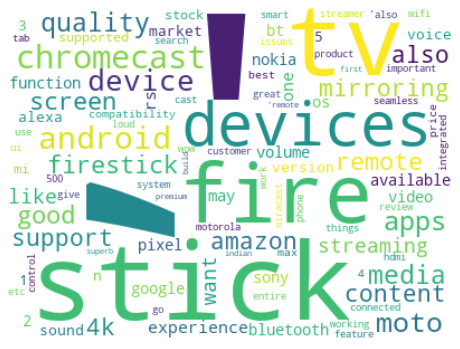

In [97]:
from wordcloud import WordCloud
import heapq
import matplotlib.pyplot as plt
wc=WordCloud(width=400,height=300,max_words=100,background_color='white').generate_from_frequencies(count)
plt.rcParams['figure.figsize'] = (8, 10)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [98]:
nltk.download('averaged_perceptron_tagger')
tagged_words=nltk.pos_tag(words)
word_tags=[]
for tw in tagged_words:
    word_tags.append(tw[0]+'-'+tw[1])
word_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\geeta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['prime-JJ', 'customer-NN', 'unhappy-JJ', 'massive-JJ', 'price-NN', 'drop-NN']

In [99]:
freq_words=heapq.nlargest(200,count,key=count.get)
freq_words

["'",
 ',',
 'stick',
 'tv',
 'fire',
 'devices',
 'chromecast',
 'android',
 'device',
 'moto',
 'apps',
 'quality',
 'media',
 'remote',
 'screen',
 'good',
 'firestick',
 'support',
 'amazon',
 'mirroring',
 'also',
 'content',
 '4k',
 'streaming',
 'want',
 'like',
 'experience',
 'rs',
 'one',
 'sony',
 'video',
 'bluetooth',
 'google',
 'os',
 'function',
 'pixel',
 'available',
 'nokia',
 'may',
 'volume',
 'bt',
 '2',
 '1',
 'market',
 'sound',
 '5',
 'n',
 'voice',
 '3',
 'alexa',
 'version',
 'supported',
 'stock',
 'mi',
 'compatibility',
 'max',
 'best',
 'price',
 '4',
 'things',
 'great',
 'seamless',
 'hdmi',
 'wow',
 'system',
 'etc',
 'go',
 'wifi',
 'working',
 'smart',
 'review',
 'miracast',
 'search',
 "'also",
 'motorola',
 'ui',
 'integrated',
 'phone',
 'feature',
 'entire',
 'cast',
 'tab',
 'give',
 'streamer',
 'use',
 'important',
 'control',
 'connected',
 'work',
 'loud',
 '500',
 'issues',
 'customer',
 'product',
 'first',
 'indian',
 'superb',
 'build',

In [100]:
import pandas as pd
import numpy as np
idf_matrix={}
for word in freq_words:
    doc_cnt=0
    for data in sentence:
        if word in nltk.word_tokenize(data):
            doc_cnt+=1
        try:
            z=((len(sentence)/doc_cnt)+1)
        except ZeroDivisionError:
            z = 0
            
    idf_matrix[word]=np.log(z+1)
idf_matrix

{"'": 0.0,
 ',': 0.0,
 'stick': 1.8658674413817768,
 'tv': 1.7272209480904839,
 'fire': 1.9218125974762528,
 'devices': 0.0,
 'chromecast': 2.224623551524334,
 'android': 2.133508762950112,
 'device': 1.8658674413817768,
 'moto': 2.330755969960742,
 'apps': 2.133508762950112,
 'quality': 2.224623551524334,
 'media': 0.0,
 'remote': 2.224623551524334,
 'screen': 2.224623551524334,
 'good': 2.456735772821304,
 'firestick': 2.456735772821304,
 'support': 2.456735772821304,
 'amazon': 2.6100697927420065,
 'mirroring': 2.330755969960742,
 'also': 2.133508762950112,
 'content': 2.456735772821304,
 '4k': 3.4339872044851463,
 'streaming': 2.6100697927420065,
 'want': 2.456735772821304,
 'like': 2.330755969960742,
 'experience': 2.6100697927420065,
 'rs': 0.0,
 'one': 2.803360380906535,
 'sony': 2.6100697927420065,
 'video': 2.6100697927420065,
 'bluetooth': 2.803360380906535,
 'google': 2.6100697927420065,
 'os': 0.0,
 'function': 2.803360380906535,
 'pixel': 2.803360380906535,
 'available': 2

In [101]:
tf_matrix={}
for word in freq_words:
    doc_tf=[]
    for data in sentence:
        frequency=0
        if word in nltk.word_tokenize(data):
            frequency+=1
        tf_word=frequency/len(nltk.word_tokenize(data))
        doc_tf.append(tf_word)
    tf_matrix[word]=doc_tf
tf_matrix

{"'": [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 ',': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'stick': [0.0,
  0.07692307692307693,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.041666666666666664,
  0.07692307692307693,
  0.0,
  0.0,
  0.0,
  0.0,

In [102]:
tfidfmatrix=[]
for word in tf_matrix.keys():
    tfidf=[]
    for value in tf_matrix[word]:
        score=value*idf_matrix[word]
        tfidf.append(score)
    tfidfmatrix.append(tfidf)
tfidfmatrix

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.14352826472167515,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0777444767242407,
  0.14352826472167515,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [103]:
wordnet={}
for i in sentence:
    words=nltk.word_tokenize(i)
    for word in words:
        if word not in wordnet.keys():
            wordnet[word]=1
        else:
            wordnet[word]+=1

In [104]:
wordnet

{'first': 3,
 'thing': 4,
 '1': 4,
 'tv': 25,
 'stick': 30,
 'indian': 2,
 'market': 4,
 '3rd': 1,
 'generation': 1,
 'fire': 17,
 'superb': 2,
 'build': 2,
 'quality': 9,
 'remote': 11,
 'premium': 2,
 'look': 1,
 'feel': 2,
 'great': 4,
 'hand': 2,
 'set': 2,
 'seamless': 3,
 'normal': 1,
 'size': 1,
 'hdmi': 3,
 'extension': 1,
 'cord': 1,
 'required': 2,
 'require': 1,
 'inside': 1,
 'box': 1,
 'worry': 1,
 'coming': 2,
 'streaming': 6,
 'wow': 4,
 'dolby': 2,
 'sound': 5,
 'give': 5,
 'surround': 1,
 'feeling': 1,
 'tried': 2,
 'sony': 5,
 '5': 4,
 'system': 3,
 'though': 1,
 'need': 2,
 'install': 1,
 'apps': 11,
 'want': 6,
 'watch': 1,
 'like': 7,
 'hotstar': 1,
 'zee5': 1,
 'voot': 1,
 'disney': 1,
 'hoichoi': 1,
 'etc': 4,
 'overall': 2,
 'experience': 6,
 'really': 2,
 'cool': 2,
 'newly': 1,
 'introduced': 1,
 'live': 2,
 'section': 1,
 'seamlessly': 1,
 'connect': 1,
 'channel': 1,
 'via': 1,
 'installed': 2,
 'verdict': 1,
 'suggest': 1,
 'convert': 1,
 'full': 2,
 'house

In [105]:
x=[]
for i in sentence:
    words=nltk.word_tokenize(i)
    vector=[]
    for word in words:
        if word in freq_words:
            vector.append(1)
        else:
            vector.append(0)
    x.append(vector)

In [106]:
x

[[1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1],
 [0, 1, 1],
 [0, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1],
 [0, 1, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 1],
 [0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
 [1],
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
 [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [107]:
import numpy as np
x=np.asarray(x)
x

C:\Users\geeta\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([list([1, 0, 1]), list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 0, 1, 1]), list([0, 1, 1]),
       list([0, 1, 1, 1, 1, 1, 1]), list([0, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), list([1]),
       list([0, 1, 1, 0, 1]),
       list([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]),
       list([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]),
       list([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]),
       list([1, 1, 1, 1, 0, 1, 0, 1, 0]), list([1, 1, 0, 1, 1]),
       list([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]),
       list([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]),
       list([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]),
       list([0, 1, 0, 0, 0, 0, 1, 0, 1, 0]),
       list([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1]),
       list([1]), 

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=500,min_df=2,max_df=0.5,stop_words=stopwords.words('english'))
X=vectorizer.fit_transform(sentence).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
from textblob import TextBlob

In [110]:
sentiment=[]
for i in sentence:
    text=TextBlob(i)
    blob=text.sentiment[0]
    sentiment.append(blob)
sentiment  

[0.25,
 0.5,
 0.35000000000000003,
 0.1,
 0.15,
 0.0,
 0.31666666666666665,
 0.0,
 0.0,
 0.175,
 0.10129870129870129,
 0.47000000000000003,
 0.372987012987013,
 0.5666666666666668,
 0.0,
 0.2962121212121212,
 0.0,
 0.39999999999999997,
 0.0,
 0.0,
 0.0,
 0.3375,
 1.0,
 -0.25,
 0.4,
 0.0,
 0.0,
 0.0,
 0.15555555555555556,
 0.0,
 0.0,
 0.07916666666666666,
 0.0,
 0.0,
 0.22499999999999998,
 0.325,
 1.0,
 0.0,
 -0.07142857142857142,
 0.3,
 0.05,
 0.3028138528138528,
 0.39999999999999997,
 -0.03333333333333336,
 0.5,
 0.12916666666666665,
 0.06666666666666668,
 0.25833333333333336,
 0.125,
 -0.26,
 0.0,
 0.25,
 -0.1,
 0.25,
 -0.6666666666666666,
 0.28,
 0.9,
 -0.3]

In [111]:
senti=[]
for i in sentiment:
    if i==0:
        senti.append('0')
    elif i>=1:
        senti.append('1')
    else:
        senti.append('-1')

In [112]:
senti

['-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '0',
 '-1',
 '0',
 '0',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '0',
 '-1',
 '0',
 '-1',
 '0',
 '0',
 '0',
 '-1',
 '1',
 '-1',
 '-1',
 '0',
 '0',
 '0',
 '-1',
 '0',
 '0',
 '-1',
 '0',
 '0',
 '-1',
 '-1',
 '1',
 '0',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '0',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1',
 '-1']

In [113]:
sentiment_class=pd.DataFrame(senti,columns=['sentiment_class'])

In [114]:
sentence

['first thing first',
 '1 tv stick indian market 3rd generation fire tv stick superb build quality',
 'remote premium look feel great hand',
 'set tv seamless',
 'normal size tv hdmi extension cord required',
 'require inside box worry coming streaming quality',
 'wow wow wow dolby sound quality give surround feeling great tried sony 5 1 sound system though',
 'need install apps want watch like hotstar zee5 voot disney hoichoi etc etc',
 'etc',
 'overall experience apps really cool',
 'newly introduced live section seamlessly connect live channel via installed apps verdict suggest want convert tv full house entertainment cool feature go blindly',
 'ultimate tv stick n browser support html5 video n xa0my first tv stick seamless setup wifi bluetooth working superb quality speed awesome act connection',
 'loved made non smart tv smart tv new amazon fire tv stick amazing',
 'great build quality remote feel premium stream quality excellent',
 'alexa voice recognition work well',
 'really li

In [115]:
reviews=pd.DataFrame(sentence,columns=['sentence'])
reviews

,sentence
0,first thing first
1,1 tv stick indian market 3rd generation fire t...
2,remote premium look feel great hand
3,set tv seamless
4,normal size tv hdmi extension cord required
5,require inside box worry coming streaming quality
6,wow wow wow dolby sound quality give surround ...
7,need install apps want watch like hotstar zee5...
8,etc
9,overall experience apps really cool


In [116]:
amazon_reviews=pd.concat([reviews,sentiment_class],axis=1)
amazon_reviews

,sentence,sentiment_class
0,first thing first,-1
1,1 tv stick indian market 3rd generation fire t...,-1
2,remote premium look feel great hand,-1
3,set tv seamless,-1
4,normal size tv hdmi extension cord required,-1
5,require inside box worry coming streaming quality,0
6,wow wow wow dolby sound quality give surround ...,-1
7,need install apps want watch like hotstar zee5...,0
8,etc,0
9,overall experience apps really cool,-1


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000,min_df=2,max_df=0.6,stop_words=stopwords.words('english'))
vector=cv.fit_transform(sentence).toarray()

In [118]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()
tfidf_vector=tfidf.fit_transform(vector).toarray()

In [120]:
tfidf_vector

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45842921, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tfidf_vector,senti,random_state=0,test_size=0.2)

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
trained=lr.fit(x_train,y_train)

In [123]:
y_pred=trained.predict(x_test)

In [124]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9, 0, 0],
       [2, 0, 0],
       [1, 0, 0]], dtype=int64)

In [125]:
from sklearn.metrics import accuracy_score
print("Accuracy using Logistic Regression :",accuracy_score(y_test,y_pred)*100,'%')

Accuracy using Logistic Regression : 75.0 %


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         9
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.25      0.33      0.29        12
weighted avg       0.56      0.75      0.64        12



C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
from sklearn.model_selection import train_test_split
x_train_NB,x_test_NB,y_train_NB,y_test_NB=train_test_split(tfidf_vector,senti,random_state=0,test_size=0.2)

In [128]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
NB=model.fit(x_train_NB,y_train_NB)
NB_result=NB.predict(x_test_NB)

In [129]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test_NB,NB_result)
cm1

array([[9, 0, 0],
       [2, 0, 0],
       [1, 0, 0]], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score
print("Accuracy using Naive Bayes classification :",accuracy_score(y_test_NB,NB_result)*100,'%')

Accuracy using Naive Bayes classification : 75.0 %


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test_NB,NB_result))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         9
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.25      0.33      0.29        12
weighted avg       0.56      0.75      0.64        12



C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train_NB,x_test_NB,y_train_NB,y_test_NB=train_test_split(tfidf_vector,senti,random_state=0,test_size=0.2)

In [133]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB_result=MNB.fit(x_train_NB,y_train_NB)

In [134]:
MNB_result = MNB.predict(x_test_NB)

In [135]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy using Multinomial NB:",accuracy_score(y_test_NB,MNB_result)*100,'%')

Accuracy using Multinomial NB: 75.0 %


In [136]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test_NB,MNB_result)
cm2

array([[9, 0, 0],
       [2, 0, 0],
       [1, 0, 0]], dtype=int64)

In [137]:
print(classification_report(y_test_NB,MNB_result))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         9
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.25      0.33      0.29        12
weighted avg       0.56      0.75      0.64        12



C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
from sklearn.model_selection import train_test_split
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(tfidf_vector,senti,random_state=0,test_size=0.2)

In [139]:
from sklearn.svm import SVC
svm=SVC(gamma='auto')
svm_result=svm.fit(x_train_svm,y_train_svm)
svm_result=svm_result.predict(x_test_svm)

In [140]:
from sklearn.metrics import accuracy_score
print("Accuracy using support vector machines:",accuracy_score(y_test_svm,svm_result)*100,'%')

Accuracy using support vector machines: 75.0 %


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test_svm,svm_result))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         9
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.25      0.33      0.29        12
weighted avg       0.56      0.75      0.64        12



C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geeta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test_svm,svm_result)
cm4

array([[9, 0, 0],
       [2, 0, 0],
       [1, 0, 0]], dtype=int64)